In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from pylab import rcParams
import matplotlib.ticker as mtick
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Loading the CSV with pandas
df = pd.read_csv('Cx_churn.csv')

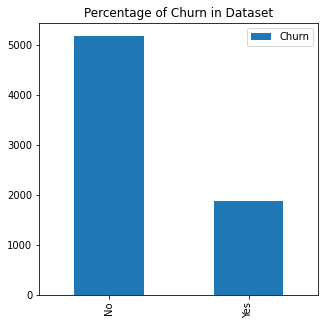

In [ ]:
# Data to plot
sizes = df['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 
rcParams['figure.figsize'] = 5,5


# Plot
sizes.plot(kind ='bar')
#plt.pie(sizes, colors=colors,autopct='%1.1f%%', shadow=True, startangle=270)
plt.legend()
plt.title('Percentage of Churn in Dataset')
plt.show()

In [ ]:
# Checking the data types of all the columns
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Converting Total Charges to a numerical data type.
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


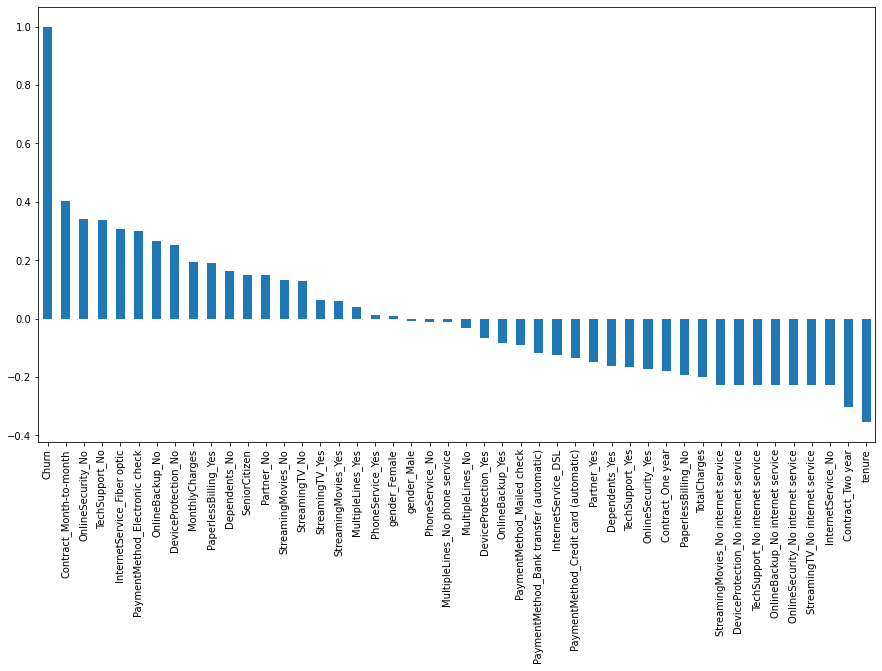

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Text(0.5, 1.0, 'Gender Distribution')

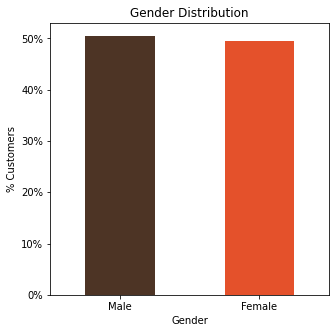

In [ ]:
colors = ['#4D3425','#E4512B']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
                                                                          
                                                                          
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_ylabel('% Customers')
ax.set_title('Gender Distribution')


Text(0.5, 1.0, '% of Senior Citizens')

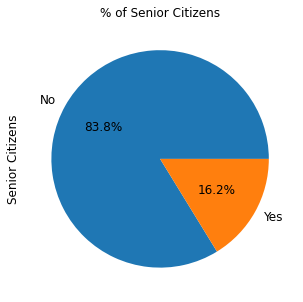

In [ ]:
ax =(df['SeniorCitizen'].value_counts()*100.0 /len(df)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                         
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Senior Citizens',fontsize = 12)
ax.set_title('% of Senior Citizens', fontsize = 12)

Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

In [ ]:
# Partner and dependent status

df2 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df2.shape

(14064, 3)

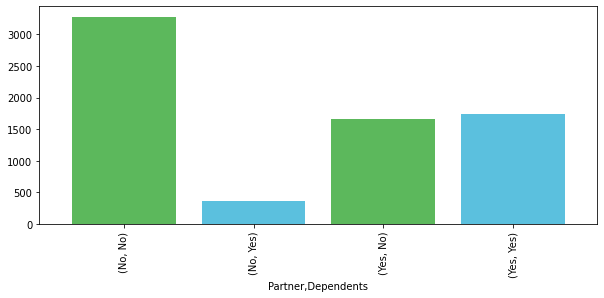

In [ ]:
colors_list = ['#5cb85c','#5bc0de']
df.groupby(['Partner','Dependents'])['customerID'].count().plot(kind='bar',figsize=(10,4),width = 0.8,color = colors_list,edgecolor=None)

Dependents    No   Yes
Partner               
No          3280   359
Yes         1653  1740


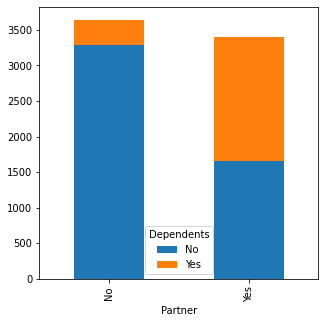

In [ ]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Partner','Dependents'])['Churn'].size().unstack()
print(partner_dependents)
partner_dependents.plot(kind = 'bar',stacked ='True')

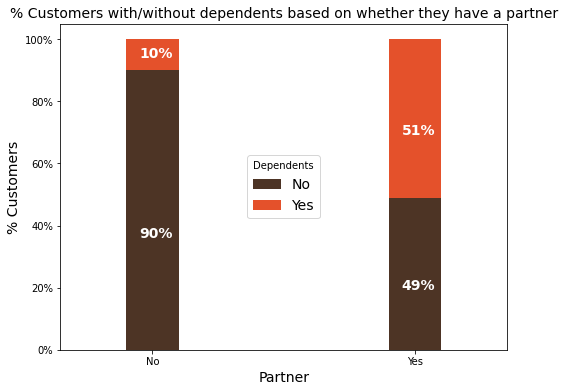

In [ ]:
ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',width = 0.2,stacked = True,rot = 0, figsize = (8,6),color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),color = 'white',weight = 'bold',size = 14)

In [ ]:
df4 = df[(df['Partner'] == 'Yes')&(df['Dependents'] == 'Yes')]
print(df4.head())
df4.groupby(['Churn'])['customerID'].count()
nc = df4.groupby(['Churn'])['customerID'].count()[0]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])
c = df4.groupby(['Churn'])['customerID'].count()[1]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])

print(nc*100)
print(c*100)

    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
10  9763-GRSKD    Male              0  ...          49.95       587.45     No
15  3655-SNQYZ  Female              0  ...         113.25      7895.15     No
18  4190-MFLUW  Female              0  ...          55.20       528.35    Yes
24  6322-HRPFA    Male              0  ...          59.60      2970.30     No
26  6467-CHFZW    Male              0  ...          99.35      4749.15    Yes

[5 rows x 21 columns]
85.6896551724138
14.310344827586208


In [ ]:
df4 = df[(df['Partner'] == 'Yes')&(df['Dependents'] == 'No')]
print(df4.head())
df4.groupby(['Churn'])['customerID'].count()
nc1 = df4.groupby(['Churn'])['customerID'].count()[0]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])
c1 = df4.groupby(['Churn'])['customerID'].count()[1]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])

print(nc1*100)
print(c1*100)

    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0   7590-VHVEG  Female              0  ...          29.85        29.85     No
8   7892-POOKP  Female              0  ...         104.80      3046.05    Yes
12  8091-TTVAX    Male              0  ...         100.35      5681.10     No
21  1680-VDCWW    Male              0  ...          19.80       202.25     No
23  3638-WEABW  Female              0  ...          59.90      3505.10     No

[5 rows x 21 columns]
74.59165154264973
25.40834845735027


In [ ]:
df4 = df[(df['Partner'] == 'No')&(df['Dependents'] == 'Yes')]
print(df4.head())
df4.groupby(['Churn'])['customerID'].count()

nc2 = df4.groupby(['Churn'])['customerID'].count()[0]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])
c2 = df4.groupby(['Churn'])['customerID'].count()[1]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])

print(nc2*100)
print(c2*100)

    customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
6   1452-KIOVK    Male              0  ...          89.10      1949.40     No
9   6388-TABGU    Male              0  ...          56.15      3487.95     No
17  9959-WOFKT    Male              0  ...         106.70      7382.25     No
29  8773-HHUOZ  Female              0  ...          64.70      1093.10    Yes
74  5630-AHZIL  Female              0  ...          64.50       177.40     No

[5 rows x 21 columns]
78.55153203342618
21.448467966573816


In [ ]:
df4 = df[(df['Partner'] == 'No')&(df['Dependents'] == 'No')]
print(df4.head())
df4.groupby(['Churn'])['customerID'].count()

nc3 = df4.groupby(['Churn'])['customerID'].count()[0]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])
c3 = df4.groupby(['Churn'])['customerID'].count()[1]/(df4.groupby(['Churn'])['customerID'].count()[0] + df4.groupby(['Churn'])['customerID'].count()[1])

print(nc3*100)
print(c3*100)

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
1  5575-GNVDE    Male              0  ...          56.95      1889.50     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes
5  9305-CDSKC  Female              0  ...          99.65       820.50    Yes

[5 rows x 21 columns]
65.76219512195122
34.237804878048784


Checking the Tenure part

Text(0.5, 1.0, '# of Customers by their tenure')

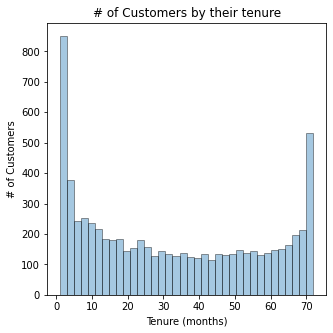

In [ ]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, bins=int(180/5),hist_kws={'edgecolor':'black'})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('# of Customers by their tenure')

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# checking the contract part

df.groupby(["Contract"])['customerID'].count()

Contract
Month-to-month    3875
One year          1472
Two year          1685
Name: customerID, dtype: int64

Text(0.5, 1.0, '# of Customers by Contract Type')

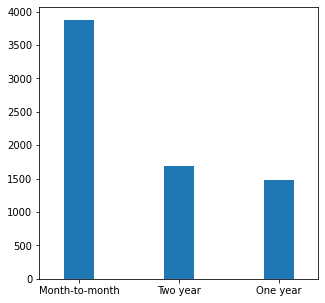

In [ ]:
x = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# of Customers')
ax.set_title('# of Customers by Contract Type')

Text(0.5, 1.0, 'Two Year Contract')

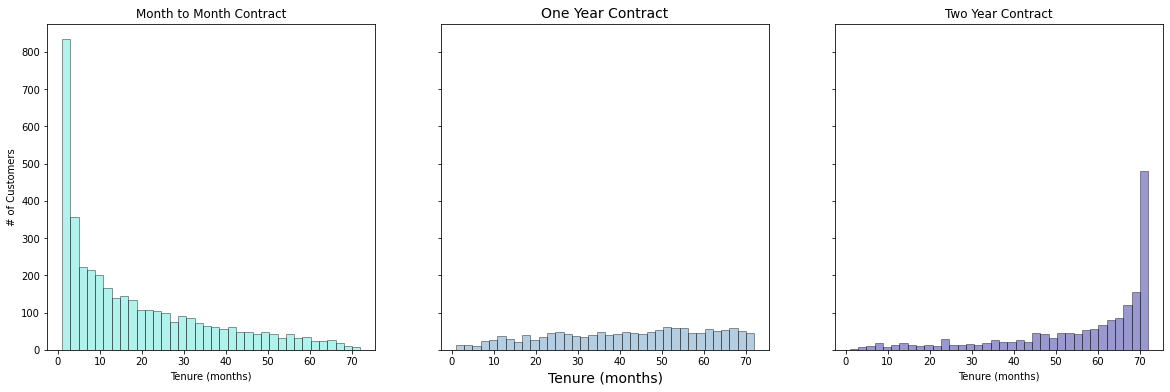

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

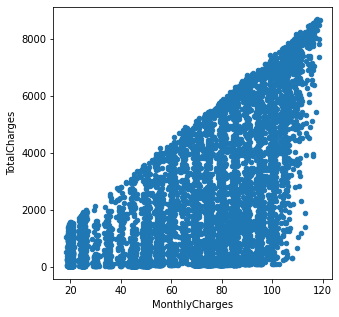

In [ ]:
df[['MonthlyCharges', 'TotalCharges']].plot.scatter(x = 'MonthlyCharges',
                                                              y='TotalCharges')

In [ ]:
# We will use the data frame where we had created dummy variables
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101,shuffle=True,stratify=y)

In [ ]:
#print(pd.Series(y_train).value_counts(normalize=True))    73,26
print(pd.Series(y_test).value_counts(normalize=True))

0    0.734186
1    0.265814
dtype: float64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
model_rf = RandomForestClassifier(n_estimators=10000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30,class_weight ='balanced')
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))
print(confusion_matrix(y_test,prediction_test))

0.7611940298507462
[[792 241]
 [ 95 279]]


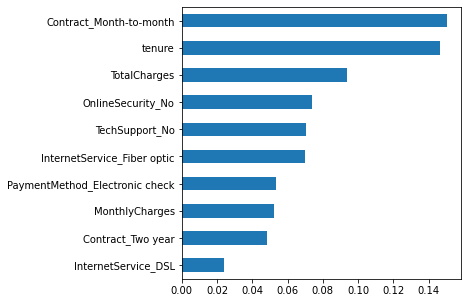

In [ ]:
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')